<a href="https://colab.research.google.com/github/Jaeljane/Data-Glacier/blob/main/Insight_for_Cab_Investment_firm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
#read the data
cab=pd.read_csv('/content/Cab_Data.csv')
Customer_id=pd.read_csv('/content/Customer_ID.csv')
Transaction_ID=pd.read_csv("/content/Transaction_ID.csv")


In [ ]:
Customer_Tran= pd.merge(Transaction_ID, Customer_id)
data = pd.merge(cab, Customer_Tran)

In [ ]:
url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
city=pd.read_csv(url,index_col=0)
city.head()

,Population,Users
City,,
NEW YORK NY,"8,405,837","302,149"
CHICAGO IL,"1,955,130","164,468"
LOS ANGELES CA,"1,595,037","144,132"
MIAMI FL,"1,339,155","17,675"
SILICON VALLEY,"1,177,609","27,247"


In [ ]:
#add city data to the main data
df= pd.merge(data, city, on='City', left_index=True)
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
9,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
9,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
9,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
9,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
9,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [ ]:
#Calculating profit
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
9,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315
9,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666
9,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568
9,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798
9,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844


In [ ]:
df['Profit_km']= df['Profit']/df['KM Travelled']

In [ ]:
#Create month and year column 
df['Date of Travel']= pd.to_datetime(df['Date of Travel'])
df['Year'] = pd.DatetimeIndex(df['Date of Travel']).year
df['Month'] = pd.DatetimeIndex(df['Date of Travel']).month
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit_km,Year,Month
9,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,1.882266,2016,8
9,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,0.826904,2016,6
9,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,3.049558,2016,2
9,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,0.777751,2016,7
9,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,1.929439,2016,3


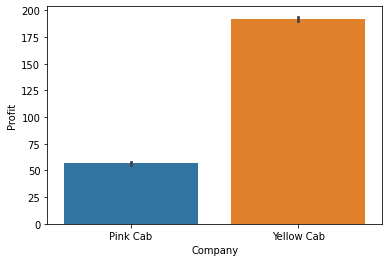

In [ ]:
#Calculating the profit
df.groupby('Company')['Profit'].sum()
ax = sns.barplot(x="Company", y="Profit", data=df)

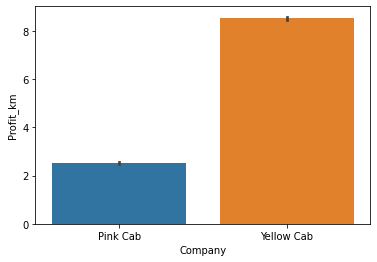

In [ ]:
#Calculating the average profit per km
df.groupby('Company')['Profit_km'].mean()
ax = sns.barplot(x="Company", y="Profit_km", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



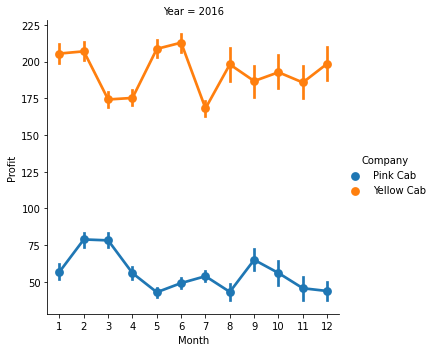

In [ ]:
# Sales trend over the months and year
sns.factorplot(data = df, x ="Month", y = "Profit", 
               
               hue = 'Company',
               row = "Year")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



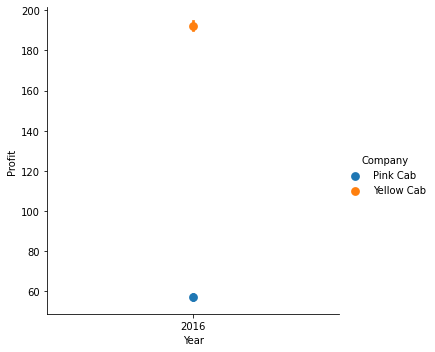

In [ ]:
sns.factorplot(x ='Year', y ='Profit', 
               hue = 'Company', data = df)
  
# Show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



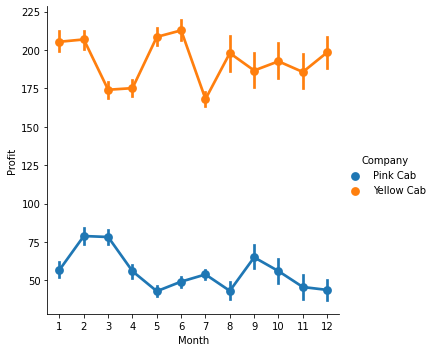

In [ ]:
sns.factorplot(x ='Month', y ='Profit', 
               hue = 'Company', data = df)
  
# Show the plot
plt.show()

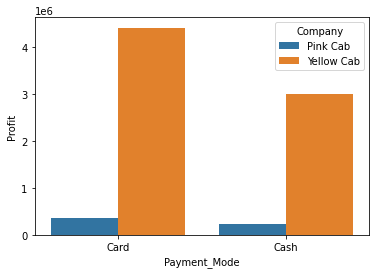

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pay=df.groupby(['Company', 'Payment_Mode'], as_index=False)['Profit'].sum()

sns.barplot(x = "Payment_Mode", y = "Profit", hue = "Company", data =pay)
plt.show()

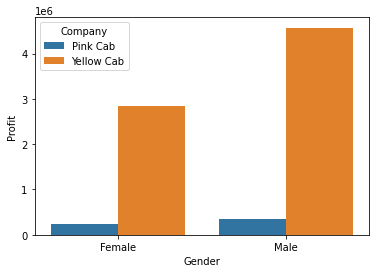

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
Gender=df.groupby(['Company', 'Gender'], as_index=False)['Profit'].sum()
sns.barplot(x = "Gender", y = "Profit", hue = "Company", data = Gender)
plt.show()

Text(0, 0.5, 'Profit')

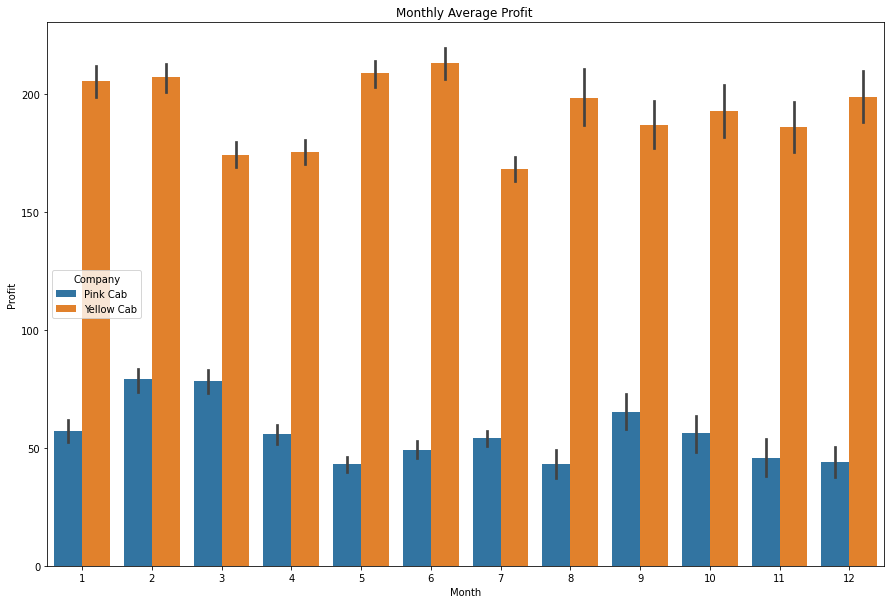

In [ ]:
df_Profit_avg=df.groupby(["Year", "Month"])["Profit"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="Month", y="Profit", hue = "Company", data=df)
plt.title("Monthly Average Profit ")
plt.xlabel("Month")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

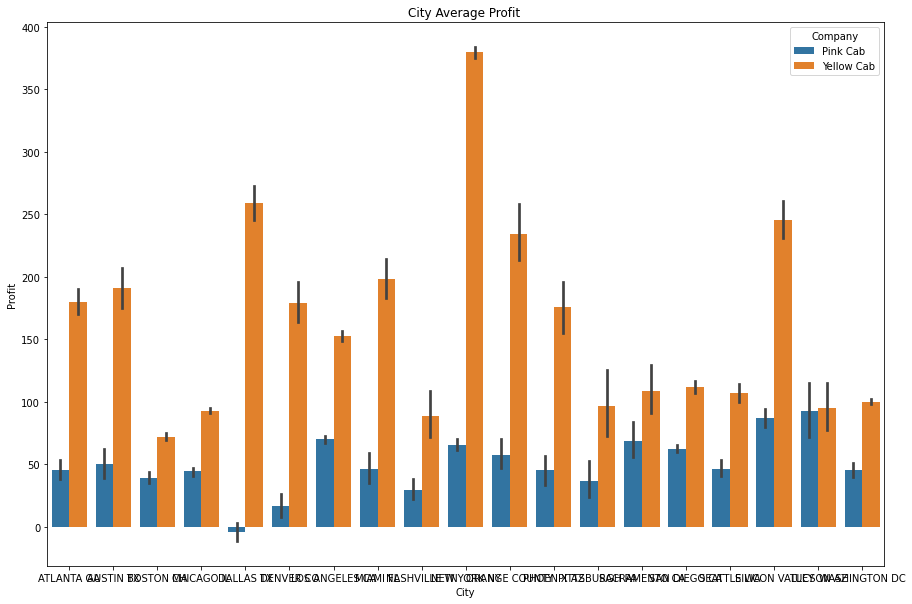

In [ ]:
df_Profit_avg=df.groupby(["City"])["Profit"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="City", y="Profit", hue = "Company", data=df)
plt.title("City Average Profit ")
plt.xlabel("City")
plt.ylabel("Profit")


In [ ]:
#Extract dat of the week
df['Day_of_week'] = df['Date of Travel'].dt.day_name()
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit_km,Year,Month,Day_of_week
9,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,1.882266,2016,8,Monday
9,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,0.826904,2016,6,Wednesday
9,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,3.049558,2016,2,Monday
9,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,0.777751,2016,7,Friday
9,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,1.929439,2016,3,Tuesday


Text(0, 0.5, 'Profit')

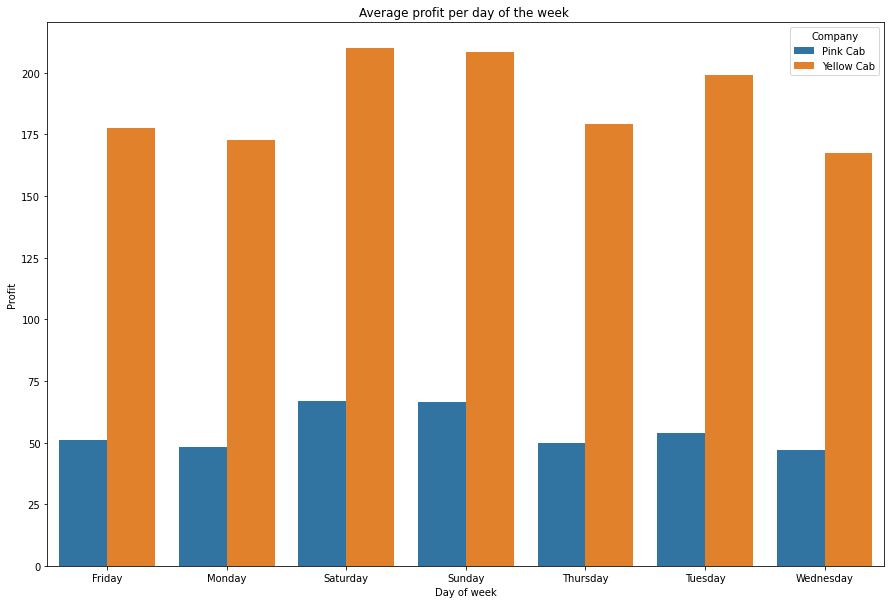

In [ ]:
df_Profit_avg=df.groupby(["Company", "Day_of_week"])["Profit"].mean().reset_index()
plt.figure(figsize=(15,10))
g=sns.barplot(x="Day_of_week", y="Profit", hue = "Company", data=df_Profit_avg)
plt.title("Average profit per day of the week ")
plt.xlabel("Day of week")
plt.ylabel("Profit")

 

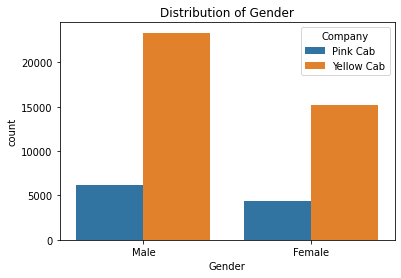

In [ ]:
sns.countplot(x='Gender', data=df, hue="Company");
plt.title('Distribution of Gender');

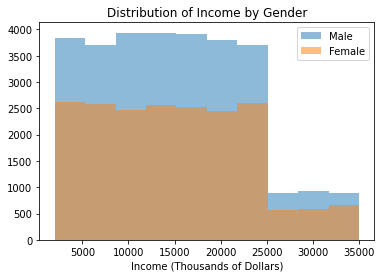

In [ ]:
# Histogram of income by gender
plt.hist('Income (USD/Month)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Income (USD/Month)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



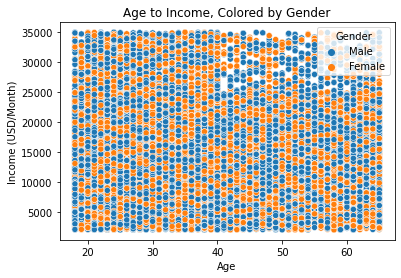

In [ ]:
sns.scatterplot('Age', 'Income (USD/Month)', hue='Gender', data=df);
plt.title('Age to Income, Colored by Gender');
#There is no clear correlation 